In [1]:
import numpy
import math 
from matplotlib import pyplot 
%matplotlib inline 

In [2]:
N = 50 
x_start, x_end = -2.0,2.0
y_start, y_end = -1.0,1.0
x = numpy.linspace(x_start,x_end,N)
y = numpy.linspace(y_start,y_end,N)
X,Y = numpy.meshgrid(x,y)

In [3]:
gamma = 5.0
x_vortex , y_vortex = -1.0 , 0.0

In [17]:
def get_velocity_vortex(strength,xv,yv,X,Y):
    
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2) 
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u,v

In [18]:
def get_stream_function_vortex(strength, xv , yv, X , Y):
    
    psi = strength/(4*numpy.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi 

In [19]:
u_vortex, v_vortex = get_velocity_vortex(gamma,x_vortex,y_vortex,X,Y)
psi_vortex = get_stream_function_vortex(gamma,x_vortex,y_vortex,X,Y)

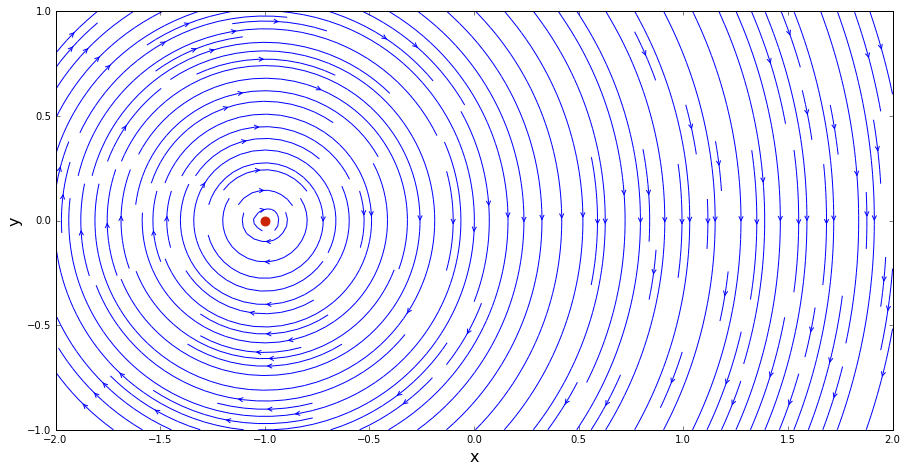

In [16]:
size = 15
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vortex, v_vortex, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

In [8]:
strength_sink = -1.0
x_sink,y_sink = 0.0, 0.0

In [9]:
def get_velocity_sink(strength,xs,ys,X,Y):

    u = strength/(2*math.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*math.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u,v

In [10]:
def get_stream_function_sink(strength,xs,ys,X,Y):
    
    psi = strength/(2*math.pi)*numpy.arctan2((Y-ys),(X-xs))
    
    return psi

In [11]:
u_sink, v_sink = get_velocity_sink(strength_sink,x_sink,y_sink,X,Y)
psi_sink = get_stream_function_sink(strength_sink,x_sink,y_sink,X,Y)

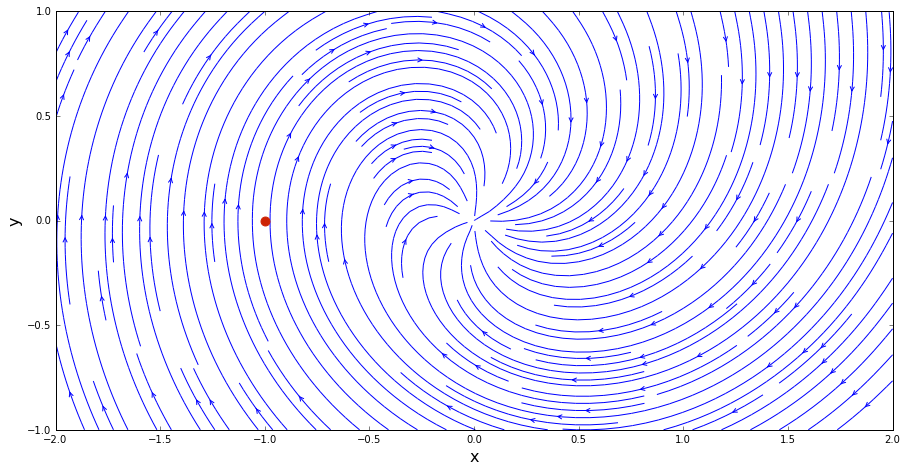

In [12]:
u = u_vortex + u_sink
v = v_vortex + v_sink
psi = psi_vortex +psi_sink

size = 15
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');